# Forked from [xueyigehe/prediction-competition](https://github.com/xueyigehe/prediction-competition)

[分享 | 游戏玩家付费金额预测大赛Top5](https://mp.weixin.qq.com/s/u5k4hkBNyTEo3S5LhsksNg)

In [3]:
import os,sys
os.chdir('D:\\Projects\\BrutalAge\\data')

In [4]:
import pandas as pd
import numpy as np
import copy
from sklearn.linear_model import Lasso,LinearRegression,LassoCV
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,scale,MaxAbsScaler

In [27]:
data = pd.read_csv('tap_fun_train.csv',parse_dates=True)
data_train = copy.copy(data[data['avg_online_minutes'] >=12])
data_train.shape

(275717, 109)

In [28]:
data_train = data_train.drop(['user_id','register_time'],axis=1)

x_train  = data_train.loc[:,data_train.columns != 'prediction_pay_price']
y_train = data_train.loc[:,data_train.columns=='prediction_pay_price']

In [29]:
model = Lasso()
model.fit(x_train,y_train)
print(len(model.coef_))

print(model.coef_)

106
[ 6.20417558e-07  5.26177183e-06 -9.01406414e-07  2.58730669e-06
  1.26297380e-05 -1.98281769e-05 -6.20828489e-07  3.81479221e-07
  8.88581620e-07 -1.90037145e-06 -4.27988000e-03  6.40414395e-03
  1.55859797e-02 -1.18105184e-02 -7.69854644e-03  8.60990278e-03
 -5.50771528e-03  3.79048587e-03 -2.52490882e-03 -2.31504390e-03
  5.66069890e-04 -2.01501130e-03 -2.87705839e-03  4.14728745e-04
  4.31926627e-04 -9.08751381e-03 -3.67890418e-03  2.78464638e-03
  9.38689525e-03 -1.09772506e-02  1.09366161e-02 -8.66451167e-02
  0.00000000e+00 -0.00000000e+00 -1.71058284e-02 -1.73949967e-01
 -1.13415193e-01  3.97065469e-01 -3.01812253e-01 -1.97414053e+00
  0.00000000e+00  6.63390184e-01 -2.30785762e-01  2.48238629e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.15786644e-01
  0.00000000e+00 -0.00000000e+00 -2.47359289e+00 -2.98786086e+00
 -6.80022616e+00  9.47380190e-01  0.00000000e+00  1.96626202e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.0

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [30]:
none_mean = []
for i in range(len(model.coef_)):
    if abs(model.coef_[i]) < 1e-06:
        none_mean.append(x_train.columns[i])
        
print(none_mean)
print(len(none_mean))

['wood_add_value', 'stone_add_value', 'meat_add_value', 'meat_reduce_value', 'magic_add_value', 'bd_training_hut_level', 'bd_healing_lodge_level', 'bd_warehouse_level', 'bd_market_level', 'bd_hero_gacha_level', 'bd_hero_strengthen_level', 'sr_scout_level', 'sr_training_speed_level', 'sr_cavalry_atk_level', 'sr_infantry_tier_3_level', 'sr_cavalry_tier_3_level', 'sr_shaman_tier_3_level', 'sr_troop_defense_level', 'sr_infantry_def_level', 'sr_cavalry_def_level', 'sr_shaman_def_level', 'sr_infantry_hp_level', 'sr_cavalry_hp_level', 'sr_shaman_hp_level', 'sr_infantry_tier_4_level', 'sr_cavalry_tier_4_level', 'sr_shaman_tier_4_level', 'sr_troop_attack_level', 'sr_hide_storage_level', 'sr_troop_consumption_level', 'sr_rss_a_prod_levell', 'sr_rss_b_prod_level', 'sr_rss_c_prod_level', 'sr_rss_d_prod_level', 'sr_rss_a_gather_level', 'sr_rss_b_gather_level', 'sr_rss_c_gather_level', 'sr_rss_d_gather_level', 'sr_troop_load_level', 'sr_rss_e_gather_level', 'sr_rss_e_prod_level', 'sr_outpost_tier_2_

In [31]:
x_train_final = x_train.drop(none_mean,axis=1)

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train_final,y_train,
                                                 test_size=0.2,random_state=0)
X_test_7days = X_test['pay_price'].tolist()

In [37]:
scaler = StandardScaler(with_mean=False).fit(X_train.values)
X_train  =scaler.transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [38]:
SGDModel = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01)
SGDModel.fit(X_train,Y_train.values.ravel())
joblib.dump(SGDModel,'train_model.m')

['train_model.m']

In [40]:
y_pred = SGDModel.predict(X_test)

In [43]:
for i in range(len(y_pred)):
    if y_pred[i] < X_test_7days[i]:
        y_pred[i] = X_test_7days[i]

In [45]:
for i in range(len(y_pred)):
    if y_pred[i] < 0:
        y_pred[i] = 0

In [46]:
print('RMSE %.2f' % mean_squared_error(Y_test,y_pred)**0.5)

print('R^2 %.2f' % r2_score(Y_test,y_pred))

RMSE 200.43
R^2 0.37


🔮`Making Prediction`

In [47]:
data1 = pd.read_csv('tap_fun_test.csv',parse_dates=True)
data1.shape

(828934, 108)

In [48]:
#for avgonlinetime<12, we use 'pay_price' only to make prediction
data_test1 =copy.copy(data1[data1['avg_online_minutes']<12])
data_test2 = copy.copy(data1[data1['avg_online_minutes']>=12])
data_test2_7days  = data_test2['pay_price'].tolist()

In [52]:
data_test_part1 = data_test1[['user_id','pay_price']]
data_test_part1.rename(columns={'pay_price':'prediction_pay_price'},inplace=True)
data_test_part1.to_csv('tap_fun_result_part1.csv')

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [53]:
data_test2_id = data_test2['user_id'].values
data_test2_id_final = pd.DataFrame(data_test2_id,columns={'user_id'})
data_test2  =data_test2.drop(['user_id','register_time'],axis=1)

In [54]:
data_test2_final = data_test2.drop(none_mean,axis=1)
data_test2_final = scaler.transform(data_test2_final.values)
data_test2_pred = SGDModel.predict(data_test2_final)

In [55]:
for i in range(len(data_test2_pred)):
    if data_test2_pred[i] < data_test2_7days[i]:
        data_test2_pred[i] = data_test2_7days[i]
        
for i in range(len(data_test2_pred)):
    if data_test2_pred[i] < 0:
        data_test2_pred[i] = 0

In [56]:
data_test2_pred_howmuch = pd.DataFrame(data_test2_pred,columns={'prediction_pay_price'})

In [57]:
data_test2_result = pd.concat([data_test2_id_final,data_test2_pred_howmuch],axis=1)
data_test2_result.to_csv('tap_fun_result_part2.csv')

In [58]:
pred_part1 = pd.read_csv('tap_fun_result_part1.csv',index_col=0,parse_dates=True)
pred_part2 = pd.read_csv('tap_fun_result_part2.csv',index_col=0,parse_dates=True)

In [59]:
pred = pred_part1.append(pred_part2)
pred.shape

(828934, 2)

In [60]:
pred.to_csv('pred_result.csv',index=False)

> This is such a great predictive model as very 'simple'. I want to extend this model to gain some insights as well as to check is there any risk if apply this model to production environment.

# Performance

Text(0, 0.5, 'Predict')

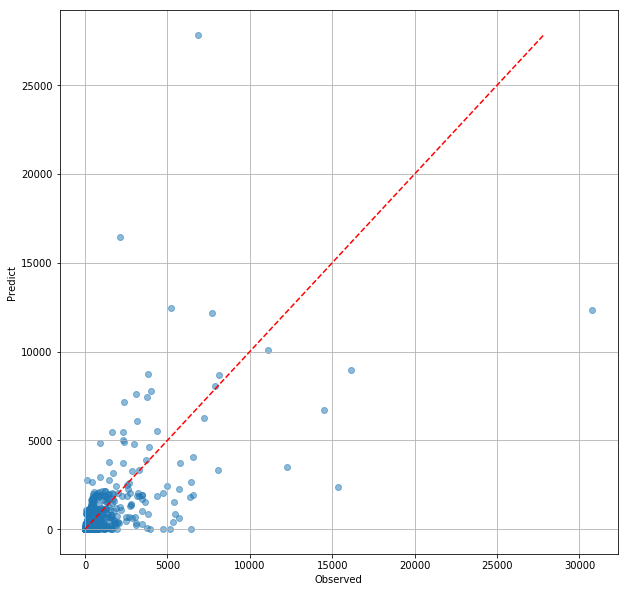

In [89]:
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.grid'] = True
plt.gray()
y_range = np.linspace(np.min(y_pred), np.max(y_pred))[:, np.newaxis]
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot(y_range,y_range,'r--')
plt.xlabel('Observed')
plt.ylabel('Predict')

# GradientBoostingRegressor

- How would changes to a datapoint affect my model’s prediction? 
- Does it perform differently for various groups–for example, historically marginalized people? 
- How diverse is the dataset I am testing my model on?